In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Imputing missing values


Importing dataset

In [2]:
diabetes = pd.read_csv('/content/drive/MyDrive/data/diabetes (1).csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking if unique values and shape of data are equal.

In [4]:
len(set(diabetes.index))

768

In [5]:
diabetes.shape

(768, 9)

Checking if there is some missing values

In [6]:
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Although it says that there aren't missing values, there are 0's inputed as missing values in columns such as Insulin, Skin Thickness, Blood Pressure, Glucose and BMI.

In [7]:
#Defining columns with missing values
missing_values = ['Insulin', 'SkinThickness', 'BloodPressure', 'Glucose', 'BMI']

In [8]:
#Replacing 0's with NaN
diabetes[missing_values] = diabetes[missing_values].replace(0,np.nan)

In [9]:
#Rechecking missing values in each varible
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
#Checking updated dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Checking mean and median using Insulin as an example to see how imputation works.

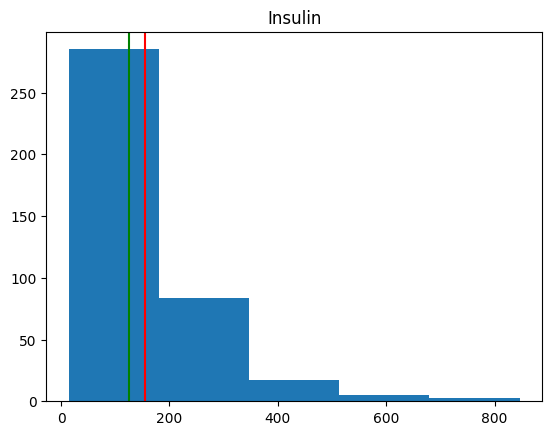

In [11]:
plt.figure()
plt.hist(diabetes['Insulin'],bins=5)
plt.axvline(diabetes['Insulin'].mean(), color='red')
plt.axvline(diabetes['Insulin'].median(), color='green')
plt.title('Insulin')
plt.show()

Checking what the median will be when we imputate it.

In [12]:
median = diabetes['Insulin'].median()
median

125.0

Imputate the median for the missing values

In [13]:
median_value = diabetes[missing_values].median()
diabetes[missing_values] = diabetes[missing_values].fillna(median_value)
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Checking updated dataset after imputing median

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
diabetes.to_csv('My-Clean-Output')

From the looks of it, this will be our cleaned dataset until more issues are found when an EDA is done.
